In [72]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


market_sales=pd.read_excel("Data.xlsx")
market_sales.head()

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation


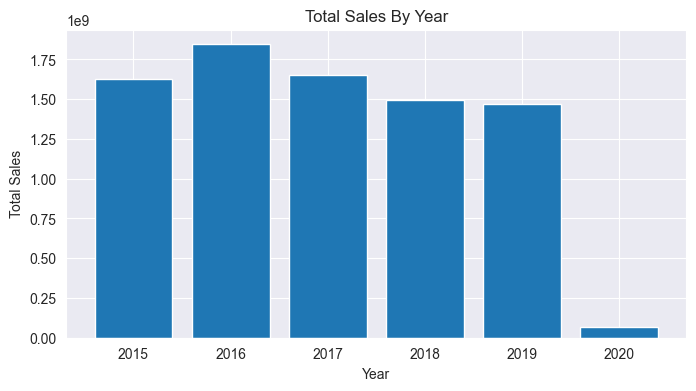

In [73]:
# 1)Find total sales by year

total_sales=market_sales.groupby("Year")["Sales"].sum().reset_index()

plt.figure(figsize=(8,4))
plt.bar(total_sales["Year"],total_sales["Sales"])
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales By Year")
plt.show()


In [74]:
#2)Number of stores opened in the year 1991.

market_sales["Store Open"]=pd.to_datetime(market_sales["Store Open"])
stores_open_1991=market_sales[market_sales["Store Open"].dt.year==1991]["Store"].nunique()
print("Number of stores opened in 1991: ",stores_open_1991)



Number of stores opened in 1991:  4


Number of stores remodeled:  830


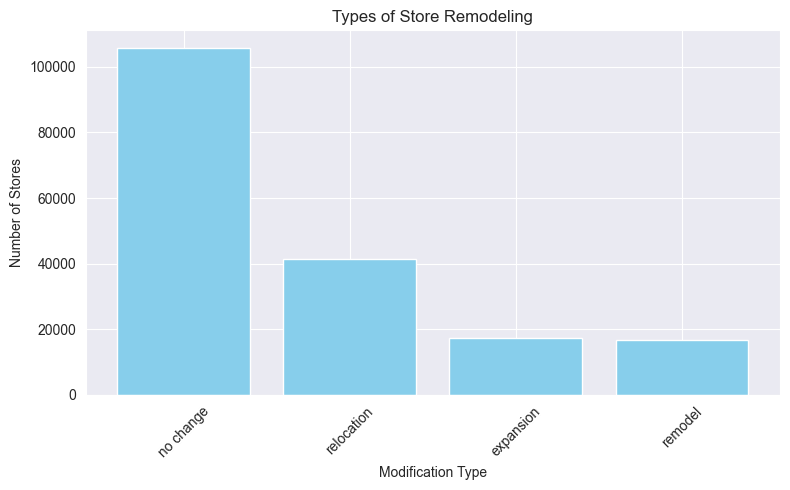

In [75]:
# 3)How many stores were remodelled during this period? (Consider all types of remodelling)

remodeled_stores = market_sales[market_sales["Store Modification"] != "No change"]["Store"].nunique()
print("Number of stores remodeled: ",remodeled_stores)

# Count of store modifications, excluding "No change"
count = market_sales[market_sales["Store Modification"] != "No change"]["Store Modification"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(count.index, count.values, color='skyblue')
plt.title("Types of Store Remodeling")
plt.xlabel("Modification Type")
plt.ylabel("Number of Stores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



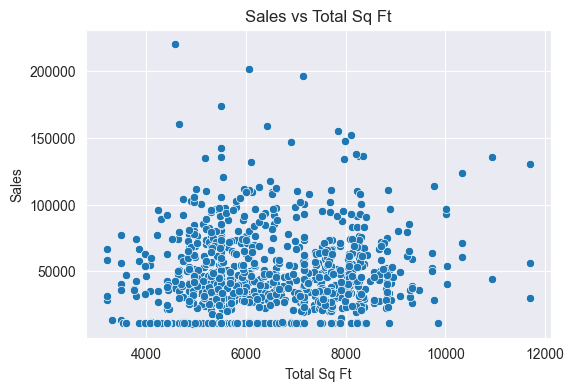

Correlation between Sales and Total Sq Ft:  0.1392254401944675


In [76]:
#4) Find the direct relationship (if any) between Sales and total sq. ft.

plt.figure(figsize=(6,4))
sns.scatterplot(data=market_sales.sample(1000),x="Total Sq Ft",y="Sales")
plt.title("Sales vs Total Sq Ft")
plt.show()

correlation=market_sales["Sales"].corr(market_sales["Total Sq Ft"])
print("Correlation between Sales and Total Sq Ft: ",correlation)

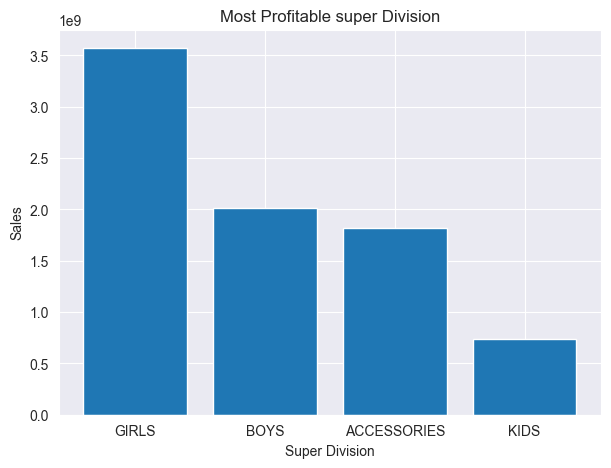

In [77]:
#5 Which Super division is most profitable?

division=market_sales.groupby("Super Division")["Sales"].sum().reset_index()
sorted_division=division.sort_values(by="Sales",ascending=False)
plt.figure(figsize=(7,5))
plt.bar(sorted_division["Super Division"],sorted_division["Sales"])
plt.title("Most Profitable super Division")
plt.xlabel("Super Division")
plt.ylabel("Sales")
plt.show()


Active stores as of today: 157484
Closed stores: 23753


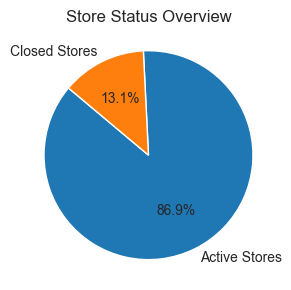

In [83]:
#6 How many stores are active as of today?

market_sales["Store Close"] = pd.to_datetime(market_sales["Store Close"], errors="coerce")

active_count = market_sales["Store Close"].isna().sum()
closed_count = market_sales["Store Close"].notna().sum()

print("Active stores as of today:", active_count)
print("Closed stores:", closed_count)

labels = ["Active Stores", "Closed Stores"]
sizes = [active_count, closed_count]
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Store Status Overview")
plt.axis("equal")
plt.tight_layout()
plt.show()



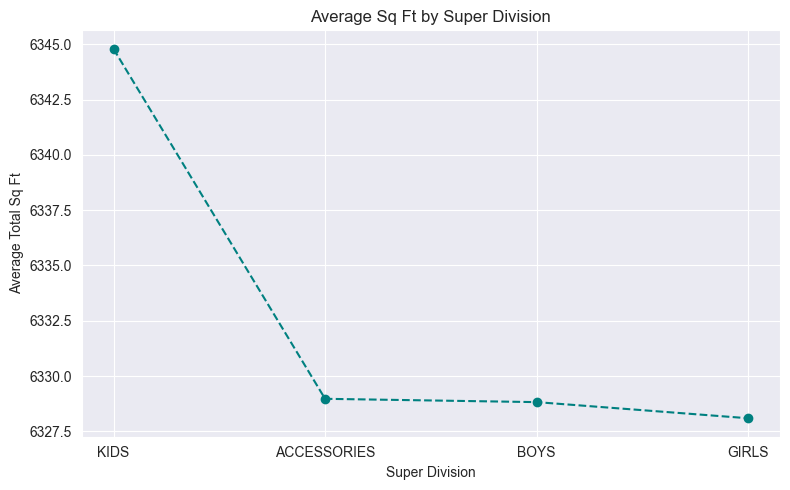

In [79]:
#7 Which super division has more sq. ft on an average across all the stores?

avg_sqft=market_sales.groupby("Super Division")["Total Sq Ft"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.plot(avg_sqft.index,avg_sqft.values,marker="o",linestyle="--",color="teal")
plt.title("Average Sq Ft by Super Division")
plt.xlabel("Super Division")
plt.ylabel("Average Total Sq Ft")
plt.grid(True)
plt.tight_layout()
plt.show()




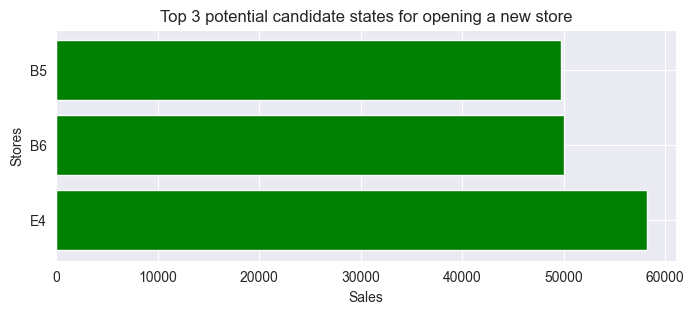

In [80]:
#8 What are the top 3 potential candidate states to consider for opening a new store?

market_sales["Store Open"]=pd.to_datetime(market_sales["Store Open"])
market_sales["Store Close"]=pd.to_datetime(market_sales["Store Close"])

stores_active=market_sales[market_sales["Store Close"].isna()]
state_sales=market_sales.groupby("State")["Sales"].mean().sort_values(ascending=False)
top_states=state_sales.head(3)

plt.figure(figsize=(8,3))
plt.barh(top_states.index,top_states.values,color="green")
plt.title("Top 3 potential candidate states for opening a new store")
plt.xlabel("Sales")
plt.ylabel("Stores")
plt.show()




Month
1         0
2     12138
3     14190
4     18541
5     22210
6     12441
7     25066
8     20499
9     10746
10    19652
11    25754
12        0
Name: count, dtype: int64


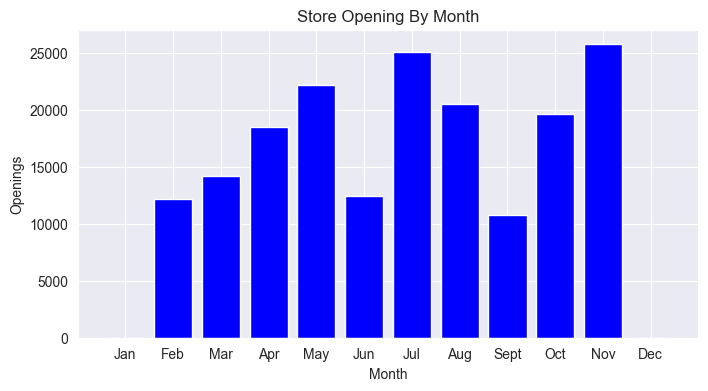

In [81]:
#9 What is the best time of the year to consider opening a store?

market_sales["Store Open"]=pd.to_datetime(market_sales["Store Open"])
market_sales["Month"]=market_sales["Store Open"].dt.month
open_month=market_sales["Month"].value_counts().sort_index()
open_month = open_month.reindex(range(1, 13), fill_value=0)
print(open_month)

plt.figure(figsize=(8,4))
plt.bar(open_month.index,open_month.values,color="blue")
plt.title("Store Opening By Month")
plt.xlabel("Month")
plt.ylabel("Openings")
plt.xticks(
    ticks=range(1,13),
    labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"]
    )
plt.show()

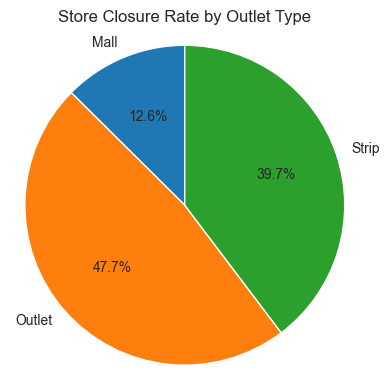

In [82]:
#10 Are there any “outlet-type” effects towards store closures?


market_sales["Is Closed"] = market_sales["Store Close"].notna()
outlets=market_sales.groupby("Outlet Type")["Is Closed"].value_counts(normalize=True).unstack().fillna(0)
outlets.columns = ["Open", "Closed"]

closure_rates = outlets["Closed"]

plt.figure(figsize=(4, 4))
plt.pie(closure_rates, labels=closure_rates.index, autopct="%1.1f%%", startangle=90)
plt.title("Store Closure Rate by Outlet Type")
plt.axis("equal")
plt.tight_layout()
plt.show()


